# Tender titles
Notebook to explore UK OCDS tender titles

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.data.path.append("../local_packages/nltk_data")

In [ ]:
# load
tenders = pd.read_csv("../data/uk_tenders_cleaned.csv")


In [28]:
tenders.head()

,Unnamed: 0,id,date,ocid,tender_id,tender_title,tender_status,tender_description,tender_value_amount,tender_value_currency,tender_suitability_sme,title_lower,title_processed,title_tokens,tokens_no_stops,title_stemmed,title_lemmatised
0,1,ocds-b5fd17-3bfc9955-92db-47de-b361-ae4caef44f...,2023-02-14T11:57:33Z,ocds-b5fd17-3bfc9955-92db-47de-b361-ae4caef44f62,Cherwell001-DN656200-67143045,**Re Tender** ITT - Investment Atlas for OxCam...,active,To view this opportunity please express an Int...,130000.00,GBP,True,**re tender** itt - investment atlas for oxcam...,re tender itt investment atlas for oxcam pan ...,"[re, tender, itt, investment, atlas, for, oxca...","['tender', 'itt', 'investment', 'atlas', 'oxca...","['tender', 'itt', 'invest', 'atla', 'oxcam', '...","['tender', 'itt', 'investment', 'atlas', 'oxca..."
1,2,ocds-b5fd17-3d24011f-70c7-4508-966f-b50ced3469...,2023-01-25T09:57:38Z,ocds-b5fd17-3d24011f-70c7-4508-966f-b50ced346941,CF-1295100D0O000000rwimUAA,For the supply of Pulmicort Turbohaler 400,complete,The Department of Health and Social Care condu...,1083000.00,GBP,False,for the supply of pulmicort turbohaler 400,for the supply of pulmicort turbohaler 400,"[for, the, supply, of, pulmicort, turbohaler, ...","['supply', 'pulmicort', 'turbohaler', '400']","['suppli', 'pulmicort', 'turbohal', '400']","['supply', 'pulmicort', 'turbohaler', '400']"
2,3,ocds-b5fd17-8e9e0c53-d5ff-4415-be12-e18643230c...,2023-02-09T09:55:19Z,ocds-b5fd17-8e9e0c53-d5ff-4415-be12-e18643230c22,CF-0033800D8d000003VQwdEAG,Molecular data generation and biobanking river...,complete,Molecular data generation and biobanking river...,393091.36,GBP,False,molecular data generation and biobanking river...,molecular data generation and biobanking river...,"[molecular, data, generation, and, biobanking,...","['molecular', 'data', 'generation', 'biobankin...","['molecular', 'data', 'gener', 'biobank', 'riv...","['molecular', 'data', 'generation', 'biobankin..."
3,4,ocds-b5fd17-8a6b7d60-8ee5-4759-9503-7487f4f259...,2023-01-26T09:15:05Z,ocds-b5fd17-8a6b7d60-8ee5-4759-9503-7487f4f25922,BIP754315245,GB-Cheltenham: TPPL Ubico HCC Lot 2 - 2 x 3.5t...,complete,2 x 3.5 Ton Chassis Cab,101951.90,GBP,False,gb-cheltenham: tppl ubico hcc lot 2 - 2 x 3.5t...,gbcheltenham tppl ubico hcc lot 2 2 x 35t cha...,"[gbcheltenham, tppl, ubico, hcc, lot, 2, 2, x,...","['gbcheltenham', 'tppl', 'ubico', 'hcc', 'lot'...","['gbcheltenham', 'tppl', 'ubico', 'hcc', 'lot'...","['gbcheltenham', 'tppl', 'ubico', 'hcc', 'lot'..."
4,5,ocds-b5fd17-7896932c-e0a4-494b-8987-a1eaaf8438...,2023-01-20T15:51:15Z,ocds-b5fd17-7896932c-e0a4-494b-8987-a1eaaf84383c,NCL001-DN645292-94742015,(NU/1433-43) Self-Enforcing Electronic Voting ...,complete,The problem that the Self -Enforcing Electroni...,30000.00,GBP,True,(nu/1433-43) self-enforcing electronic voting ...,nu143343 selfenforcing electronic voting seev ...,"[nu143343, selfenforcing, electronic, voting, ...","['nu143343', 'selfenforcing', 'electronic', 'v...","['nu143343', 'selfenforc', 'electron', 'vote',...","['nu143343', 'selfenforcing', 'electronic', 'v..."


### Clean up

In [ ]:
# can we extract anything helpful from tender title?

tenders["title_lower"] = tenders['tender_title'].str.lower()

def remove_punct(ptext):
    # replace any punctuation with nothing "", effectively removing it
    ptext = re.sub(string=ptext,
                   pattern="[{}]".format(string.punctuation), 
                   repl="")
    return ptext

# TODO this doesn't parse out all our "[]" chars


In [ ]:
# remove empty titles
tenders["title_lower"].replace('', np.nan, inplace=True)
tenders.dropna(subset=['title_lower'], inplace=True)


In [ ]:
# apply removing punctuation function to all elements in the column "abstract"
tenders['title_processed'] = tenders['title_lower'].apply(remove_punct)

### Tokenize

In [ ]:
# tokenize
tenders['title_tokens'] = tenders['title_processed'].apply(nltk.word_tokenize)

### Stops

In [ ]:
### Stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stopwords from list of tokens
def clean_stopwords(tokens):
    # define stopwords
    stop_words = set(stopwords.words('english'))
    # add bespoke for this
    stop_words.add("amp")
    stop_words.add("test")
    # loop through each token and if the word isn't in the set 
    # of stopwords keep it
    return [item for item in tokens if item not in stop_words]
tenders['tokens_no_stops'] = tenders['title_tokens'].apply(clean_stopwords)
tenders.tokens_no_stops.head(35)

### Stem

In [ ]:
def stemming(ptoken):
    # create stemming object
    stemmer = PorterStemmer()
    return [stemmer.stem(token) for token in ptoken]  

In [ ]:
tenders["title_stemmed"] = tenders["tokens_no_stops"].apply(stemming)

### Lemmatize

In [ ]:
# Define the lemmatise() function

def lemmatise(ptokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in ptokens]

In [ ]:
tenders["title_lemmatised"] = tenders["tokens_no_stops"].apply(lemmatise)

In [ ]:
tenders.title_lemmatised.head(10)

### Results

In [ ]:
from collections import Counter

In [ ]:
tenders.tokens_no_stops = tenders.tokens_no_stops.astype("string")

In [ ]:
tenders.title_lemmatised = tenders.title_lemmatised.astype("string")
tenders.title_stemmed = tenders.title_stemmed.astype("string")

In [ ]:

results = Counter()
tenders["title_lemmatised"].str.split("'").apply(results.update)
#tenders.title_stemmed.str.split("'").apply(results.update)


In [ ]:
print("Tokens:", sum(dict(results).values()))


In [ ]:
results.most_common()

In [ ]:
# separate out the tokens and counts into lists
tokens, counts = zip(*results.most_common())

In [ ]:
def plotall(px, py):
    
    plt.xticks(fontsize=12, rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel("Tokens")
    plt.bar(px, py)
    plt.show()

In [ ]:
plotall(tokens[3:30], counts[3:30])

## wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

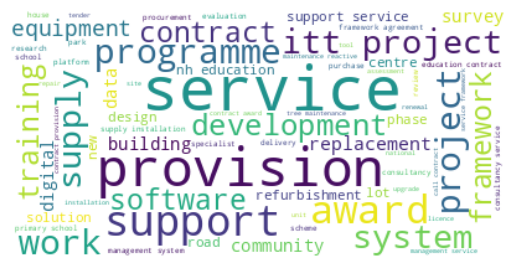

In [29]:
# Join all the token data as string
#tenders['tokens_lem'] = tenders['tokens_no_stops'].apply(return_tostring)
text = " ".join(tenders['title_lemmatised'])
text = text.replace("'", "")
 

# The text string is then passed to the wordcloud function:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("../output/uk_tender_titles_world.png")
plt.show()
